<a href="https://colab.research.google.com/github/meherdurdana/Data-Science/blob/main/Machine_learning_lab_performance_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB PERFORMANCE**
---
---
### <B> Machine Learning Driven Data Analysis I and Communicating Data Insights Lab </B> 
*Course Code: DS422*
</br>
</br>

<u> Submitted By: </u>
##### Meher Durdana Khan Raisa
ID: 192-35-2818

Question 1
---
**Load the dataset into the Pandas DataFrame and use the appropriate functions to print the number of data and features, the data type for each feature, and a descriptive summary of each feature. For example, if the feature is categorical, you should compute frequency, mode, etc. If the feature is numeric, you should compute mean, median, quartiles, minimum, maximum, etc. Find out if there is any data imbalance or skewed numeric feature.** 

---
Here we are using **Breast Cancer Wisconsin (Diagnostic) Data Set** from Kaggle.

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
print('----------------------------------------------------------------------')
print("Number of data points:", df.shape[0])
print('----------------------------------------------------------------------')
print("Number of features:", df.shape[1])
print('----------------------------------------------------------------------')
print("Data types of each feature:")
print(df.dtypes)
print('----------------------------------------------------------------------')
print("Descriptive summary of each feature:")
print(df.describe(include='all'))
print('----------------------------------------------------------------------')
# Check categorical feature imbalance
print("Frequency of each categorical feature:")
for column in df.select_dtypes(include='object'):
    print(column)
    print(df[column].value_counts())
    print()
print('----------------------------------------------------------------------')
# Check skewness of numeric features
print("Skewness of numeric features:")
print(df.select_dtypes(include='number').skew())

----------------------------------------------------------------------
Number of data points: 569
----------------------------------------------------------------------
Number of features: 32
----------------------------------------------------------------------
Data types of each feature:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_

Question 2
---
**Check for any missing values and, if necessary, fill them in or get rid of them. Explain why you think removal or imputation is best. Convert any categorical feature into numeric or bin numeric feature into categorical groups, or log transform skewed numeric features as necessary.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("Number of missing values in each feature:")
print(df.isnull().sum())
print('----------------------------------------------------------------------')
df = df.dropna()  

# Convert the target variable (diagnosis) to numeric using label encoding
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

skewness = df.select_dtypes(include='number').skew()

# Identify numeric features with skewness above a threshold (e.g., 1)
skewed_features = skewness[skewness > 1].index

# Log transform skewed features
df[skewed_features] = np.log1p(df[skewed_features])



Number of missing values in each feature:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
-----------------

Question 3
---
**Use the right charts to show what your features are. For example, make a bar chart if your feature is based on groups. If your feature is a number, you should make a histogram for it. Then visualize the interactions between multiple features using scatter plot, grouped bar chart, stacked bar chart, heatmaps, etc.**

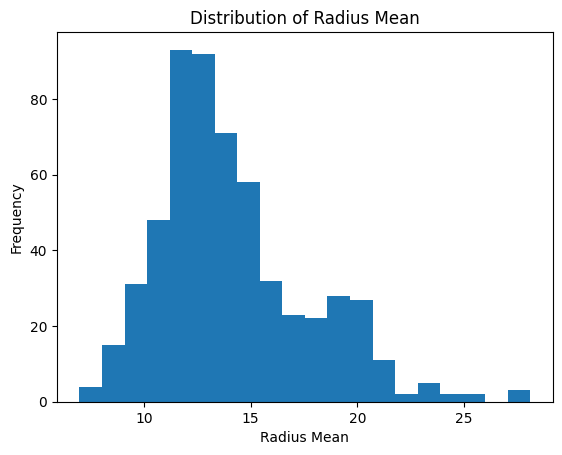

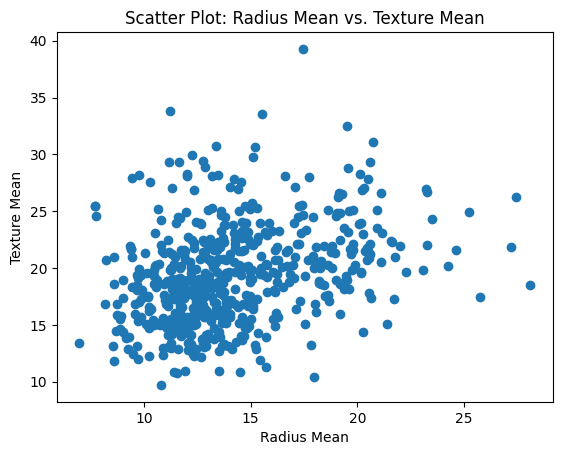

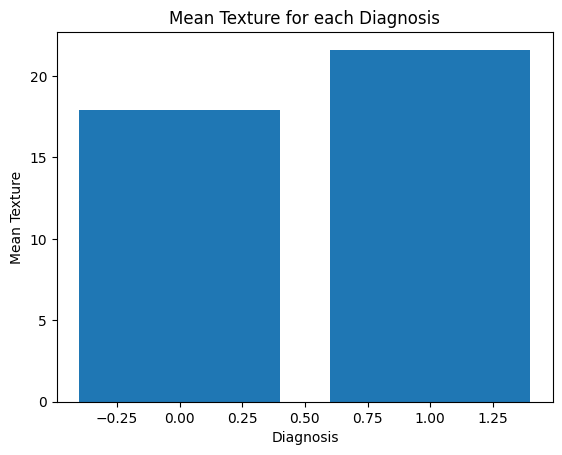

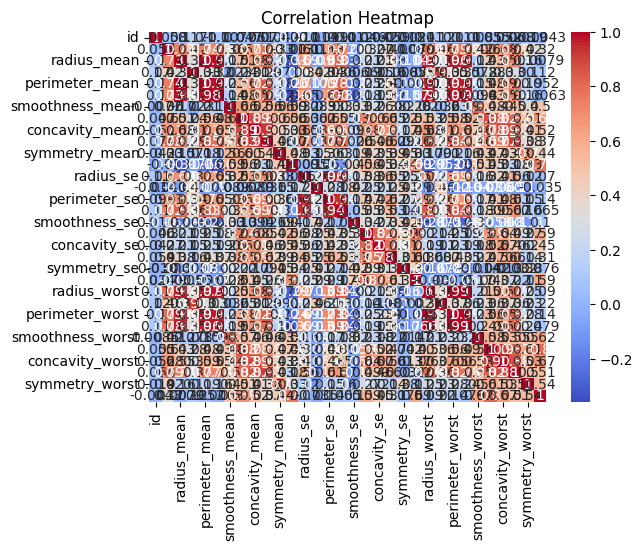

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.hist(df['radius_mean'], bins=20)
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Radius Mean')
plt.show()

plt.scatter(df['radius_mean'], df['texture_mean'])
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot: Radius Mean vs. Texture Mean')
plt.show()

grouped_data = df.groupby('diagnosis')['texture_mean'].mean()
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')
plt.title('Mean Texture for each Diagnosis')
plt.show()


# Example: Heatmap of correlation matrix for numeric features
numeric_features = df.select_dtypes(include='number')
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Question 4
---
Determine if there is any correlation between the numeric features of your dataset. Find the Pandas library function that calculates the correlation between each pair of numbers. Use pair plot from the Seaborn library or a similar tool to visualize the correlation.

In [ ]:
correlation_matrix = df.select_dtypes(include='number').corr()


sns.pairplot(df.select_dtypes(include='number'))
plt.show()

#sns.pairplot(df.select_dtypes(include='number'), annot=True)
#plt.show()



Question 5
---
Train an appropriate machine learning model based on your target variable. For example, if your target is categorical, use a classification algorithm. If your target variable is numeric, use a regression algorithm. Do not forget to split your dataset into train and test data. Print the train and test accuracy of your model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df.drop(['id', 'diagnosis'], axis=1)  
y = df['diagnosis'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

train_predictions = rf_classifier.predict(X_train)
test_predictions = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 0.9649122807017544


Question 6
---
**Train another machine learning model using 10-fold cross-validation and report the average validation accuracy with 95% confidence interval. Compare the result with its test accuracy. Try to evaluate your test data using bootstrapping method to find average test accuracy with 95% confidence interval.**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Prepare the data and target variables
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=10)

# Calculate the average validation accuracy and confidence interval
mean_accuracy = np.mean(cv_scores)
confidence_interval = np.percentile(cv_scores, [2.5, 97.5])

print("Average Validation Accuracy:", mean_accuracy)
print("Confidence Interval (95%):", confidence_interval)

# Bootstrap for test accuracy estimation
n_bootstrap = 1000
bootstrap_scores = []
rng = np.random.default_rng(42)

for _ in range(n_bootstrap):
    # Create a bootstrap sample
    indices = rng.choice(range(len(X)), size=len(X), replace=True)
    X_bootstrap = X.iloc[indices]
    y_bootstrap = y.iloc[indices]

    # Train a model on the bootstrap sample
    rf_classifier.fit(X_bootstrap, y_bootstrap)

    # Calculate the accuracy on the test set
    test_predictions = rf_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    bootstrap_scores.append(test_accuracy)

# Calculate the average test accuracy and confidence interval
mean_test_accuracy = np.mean(bootstrap_scores)
confidence_interval_test = np.percentile(bootstrap_scores, [2.5, 97.5])

print("Average Test Accuracy:", mean_test_accuracy)
print("Confidence Interval (95%) for Test Accuracy:", confidence_interval_test)


Average Validation Accuracy: 0.9631578947368421
Confidence Interval (95%): [0.90263158 1.        ]
Average Test Accuracy: 0.9864999999999998
Confidence Interval (95%) for Test Accuracy: [0.96491228 1.        ]


Question 7
---
**Train a decision tree algorithm and tune at least 5 hyperparameters using GridSearchCV or RandomSearchCV. Select the best model and report the best hyperparameters.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
random_search.fit(X_train, y_train)


print("Best Hyperparameters (GridSearchCV):", grid_search.best_params_)
print("Best Score (GridSearchCV):", grid_search.best_score_)

print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Score (RandomizedSearchCV):", random_search.best_score_)


Best Hyperparameters (GridSearchCV): {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best Score (GridSearchCV): 0.9472527472527472
Best Hyperparameters (RandomizedSearchCV): {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 9, 'criterion': 'entropy'}
Best Score (RandomizedSearchCV): 0.9472527472527472


Question 9
---
**Evaluate your model using multiple metrics.
For example, if your task is classification, generate a confusion matrix 
and report precision, recall, f1 score, and so on. 
If your task is regression, report MAE, MSE, RMSE, and so on.**

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,mean_absolute_error,mean_squared_error


y_pred = random_search.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Confusion Matrix:
[[70  1]
 [ 5 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315
Mean Absolute Error (MAE): 0.05263157894736842
Mean Squared Error (MSE): 0.05263157894736842
Root Mean Squared Error (RMSE): 0.22941573387056177
